In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import SimpleImputer

In [18]:
# Define the Snowflake connection parameters
SNOWFLAKE_ACCOUNT = 'rz83141.ap-northeast-2.aws'
SNOWFLAKE_USER = 'KZ'
SNOWFLAKE_PASSWORD = 'Islam.1234567890'
SNOWFLAKE_DATABASE = 'SECONDYEARINTERNSHIP'
SNOWFLAKE_SCHEMA = "DATA"
SNOWFLAKE_WAREHOUSE = 'COMPUTE_WH'

In [19]:
# Create a Snowflake connection
engine = create_engine(
    f'snowflake://{SNOWFLAKE_USER}:{SNOWFLAKE_PASSWORD}@{SNOWFLAKE_ACCOUNT}/{SNOWFLAKE_DATABASE}/Data',
    echo=False  # Set to True for debug output
)

In [20]:
# Define a query to retrieve the latest sensor data
latest_sensor_data_query = f"""
    SELECT *
    FROM {SNOWFLAKE_SCHEMA}.SENSOR_DATA_TABLE
    ORDER BY eventtimestamp DESC
 """

# Execute the query and retrieve the data into a Pandas DataFrame
sensor_data_df = pd.read_sql(latest_sensor_data_query, engine)

# Process the retrieved sensor data
print("Latest Sensor Data:")
print(sensor_data_df)

Latest Sensor Data:
          eventtimestamp machineryequipment  engine_temperature  \
0    2023-03-30 20:07:34       Haul Truck 3           97.290000   
1    2023-03-30 00:59:40          Crusher 5                 NaN   
2    2023-03-29 22:42:10             Mill 4                 NaN   
3    2023-03-29 14:12:44       Haul Truck 5           87.220000   
4    2023-03-29 00:39:21        Excavator 3           82.180000   
...                  ...                ...                 ...   
2695 2022-01-01 10:27:14        Excavator 5          107.440365   
2696 2022-01-01 10:02:25          Crusher 3                 NaN   
2697 2022-01-01 08:53:38             Pump 2                 NaN   
2698 2022-01-01 05:58:47        Separator 4                 NaN   
2699 2022-01-01 05:50:14             Mill 4                 NaN   

      hydraulic_system_temperature  bearing_temperature  vibration  \
0                              NaN                  NaN        NaN   
1                        66.036204 

In [21]:
# Define a query to retrieve the latest maintenance logs
latest_maintenance_logs_query = f"""
    SELECT *
    FROM {SNOWFLAKE_SCHEMA}.MAINTENANCE_LOGS_TABLE
    ORDER BY eventtimestamp DESC
"""

# Execute the query and retrieve the data into a Pandas DataFrame
maintenance_logs_df = pd.read_sql(latest_maintenance_logs_query, engine)

# Process the retrieved maintenance logs
print("Latest Maintenance Logs:")
print(maintenance_logs_df)

Latest Maintenance Logs:
         eventtimestamp machineryequipment maintenance_action  \
0   2023-03-30 20:46:34             Mill 3             Repair   
1   2023-03-30 19:25:21        Separator 3         Inspection   
2   2023-03-30 06:12:11       Compressor 2             Repair   
3   2023-03-28 04:32:51        Excavator 3         Inspection   
4   2023-03-26 18:33:57        Excavator 1             Repair   
..                  ...                ...                ...   
371 2022-01-06 08:07:37          Crusher 2         Inspection   
372 2022-01-04 02:59:32             Pump 4         Inspection   
373 2022-01-03 23:33:37        Separator 2         Inspection   
374 2022-01-02 18:01:20       Haul Truck 5         Inspection   
375 2022-01-02 02:43:36             Mill 5         Inspection   

                                           description  
0    Kitchen two few student provide office meeting...  
1                  Visit often any. First crime radio.  
2    College position p

In [22]:
# Define a query to retrieve the latest historical failure data
latest_failure_data_query = f"""
    SELECT *
    FROM {SNOWFLAKE_SCHEMA}.HISTORICAL_FAILURE_DATA_TABLE
    ORDER BY eventtimestamp DESC
"""

# Execute the query and retrieve the data into a Pandas DataFrame
failure_data_df = pd.read_sql(latest_failure_data_query, engine)

# Process the retrieved historical failure data
print("Latest Historical Failure Data:")
print(failure_data_df)

Latest Historical Failure Data:
        eventtimestamp machineryequipment  \
0  2023-03-28 18:46:34             Mill 3   
1  2023-03-25 17:33:57        Excavator 1   
2  2023-03-08 05:10:49        Separator 2   
3  2023-03-04 21:25:19             Pump 5   
4  2023-03-03 09:55:15       Compressor 4   
5  2023-02-24 09:31:33       Haul Truck 2   
6  2023-02-21 17:41:33          Crusher 5   
7  2023-02-10 13:33:52        Excavator 5   
8  2023-02-05 16:07:45          Crusher 4   
9  2023-02-05 01:39:53             Pump 2   
10 2023-02-02 06:59:52        Excavator 3   
11 2022-12-26 06:35:25       Compressor 1   
12 2022-12-21 13:57:39          Crusher 4   
13 2022-12-08 22:20:13         Conveyor 5   
14 2022-12-06 02:42:52         Conveyor 2   
15 2022-12-03 17:31:14        Separator 5   
16 2022-12-02 19:47:35       Compressor 2   
17 2022-11-29 05:38:28          Crusher 1   
18 2022-11-07 20:30:49       Haul Truck 4   
19 2022-10-26 17:16:18          Crusher 4   
20 2022-09-29 18:24:14 

In [23]:
# Visualizing Sensor Readings and Maintenance Data

In [24]:
# Set the style for visualizations
sns.set(style="whitegrid")

In [25]:
# Basic statistics and overview of dataframes
print("Maintenance Logs DataFrame Overview:")
print(maintenance_logs_df.info())
print(maintenance_logs_df.head())

Maintenance Logs DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventtimestamp      376 non-null    datetime64[ns]
 1   machineryequipment  376 non-null    object        
 2   maintenance_action  376 non-null    object        
 3   description         376 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 11.9+ KB
None
       eventtimestamp machineryequipment maintenance_action  \
0 2023-03-30 20:46:34             Mill 3             Repair   
1 2023-03-30 19:25:21        Separator 3         Inspection   
2 2023-03-30 06:12:11       Compressor 2             Repair   
3 2023-03-28 04:32:51        Excavator 3         Inspection   
4 2023-03-26 18:33:57        Excavator 1             Repair   

                                         description  
0  Kitchen two few stude

In [26]:
print("\nLatest Failure Data DataFrame Overview:")
print(failure_data_df.info())
print(failure_data_df.head())


Latest Failure Data DataFrame Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventtimestamp      53 non-null     datetime64[ns]
 1   machineryequipment  53 non-null     object        
 2   description         53 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.4+ KB
None
       eventtimestamp machineryequipment  \
0 2023-03-28 18:46:34             Mill 3   
1 2023-03-25 17:33:57        Excavator 1   
2 2023-03-08 05:10:49        Separator 2   
3 2023-03-04 21:25:19             Pump 5   
4 2023-03-03 09:55:15       Compressor 4   

                                         description  
0  Much give believe money skin job. Opportunity ...  
1      Leg five since your. Size raise rather court.  
2  Until walk true director return there church p...  
3  Discover front myself win

In [27]:
# Summary statistics for numeric columns in sensor_data_df
sensor_columns = [col for col in sensor_data_df.columns if col not in ['eventtimestamp', 'machineryequipment']]
print("\nSummary Statistics for Sensor Readings:")
print(sensor_data_df[sensor_columns].describe())


Summary Statistics for Sensor Readings:
       engine_temperature  hydraulic_system_temperature  bearing_temperature  \
count          900.000000                    900.000000          1500.000000   
mean            90.113588                     60.929296            51.847202   
std              5.771478                      5.741595             9.006873   
min             80.000000                     50.279906            40.020000   
25%             85.230000                     56.107972            45.287500   
50%             89.923750                     60.845995            50.910000   
75%             95.175000                     66.006609            56.125000   
max            107.440365                     71.327940            97.105011   

         vibration  transmission_temperature  braking_system_temperature  \
count  1200.000000                600.000000                  300.000000   
mean      2.534940                 80.696235                   91.399411   
std       

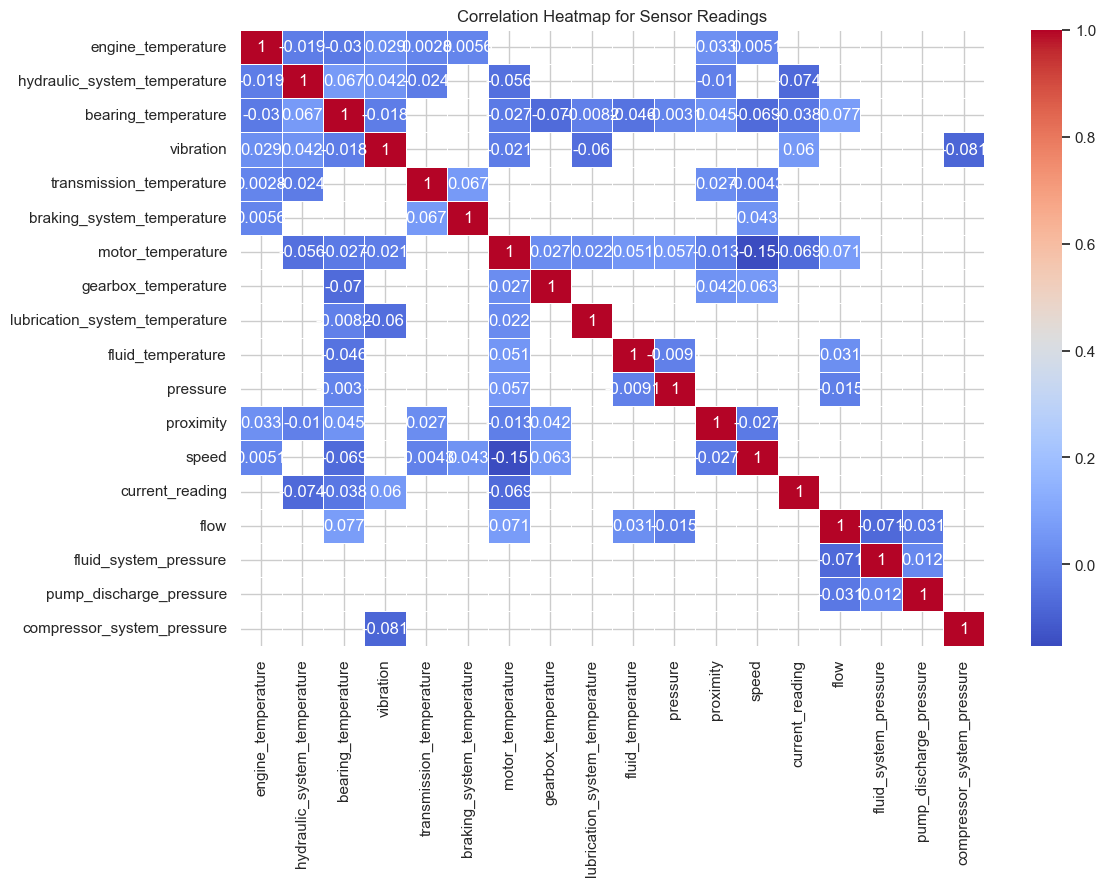

In [28]:
# Correlation heatmap for sensor readings
sensor_data_corr = sensor_data_df[sensor_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(sensor_data_corr, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap for Sensor Readings")
plt.show()

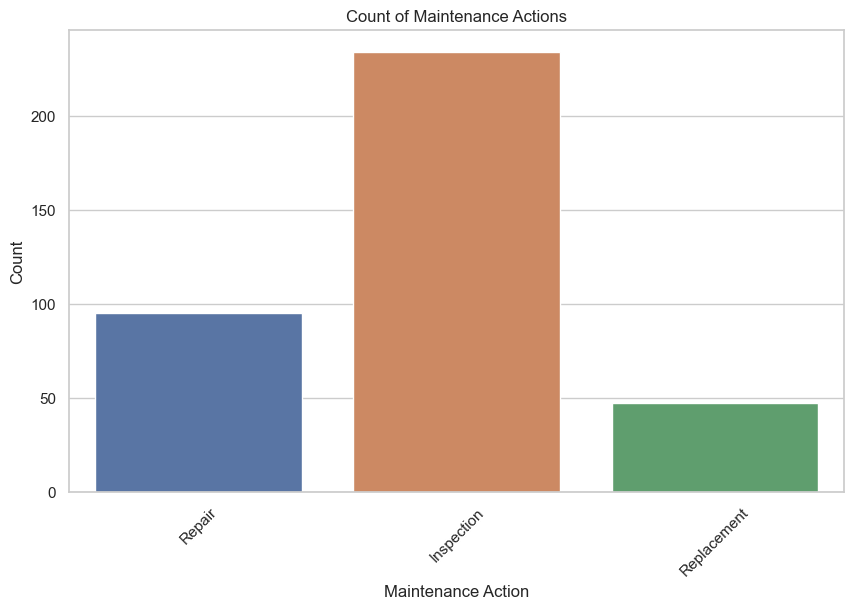

In [29]:
# Count of maintenance actions
plt.figure(figsize=(10, 6))
sns.countplot(data=maintenance_logs_df, x='maintenance_action')
plt.title("Count of Maintenance Actions")
plt.xlabel("Maintenance Action")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

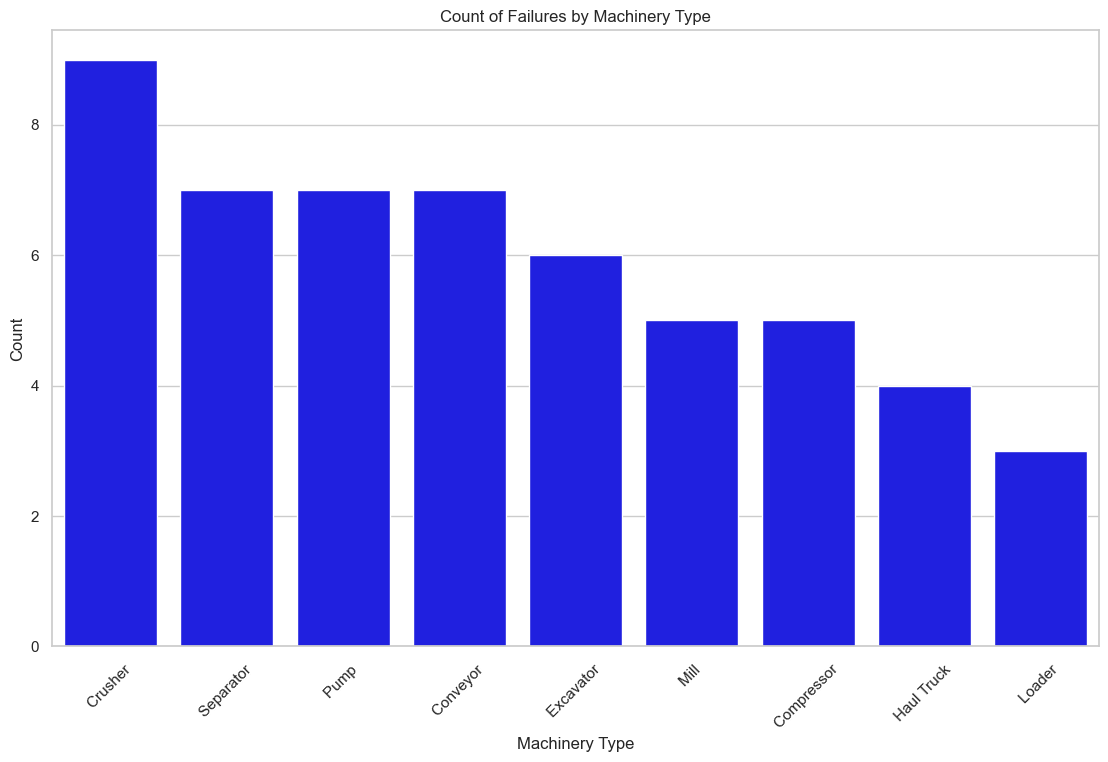

In [30]:
# Remove numeric part from machineryequipment column
failure_data_df['machineryequipment'] = failure_data_df['machineryequipment'].apply(lambda x: re.sub(r'\d+', '', x))

# Count the occurrences of each machinery type
machinery_counts = failure_data_df['machineryequipment'].value_counts()

# Count of failures by machinery type
plt.figure(figsize=(len(machinery_counts) * 1.5, 8))
sns.barplot(x=machinery_counts.index, y=machinery_counts.values, color='blue')
plt.title("Count of Failures by Machinery Type")
plt.xlabel("Machinery Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

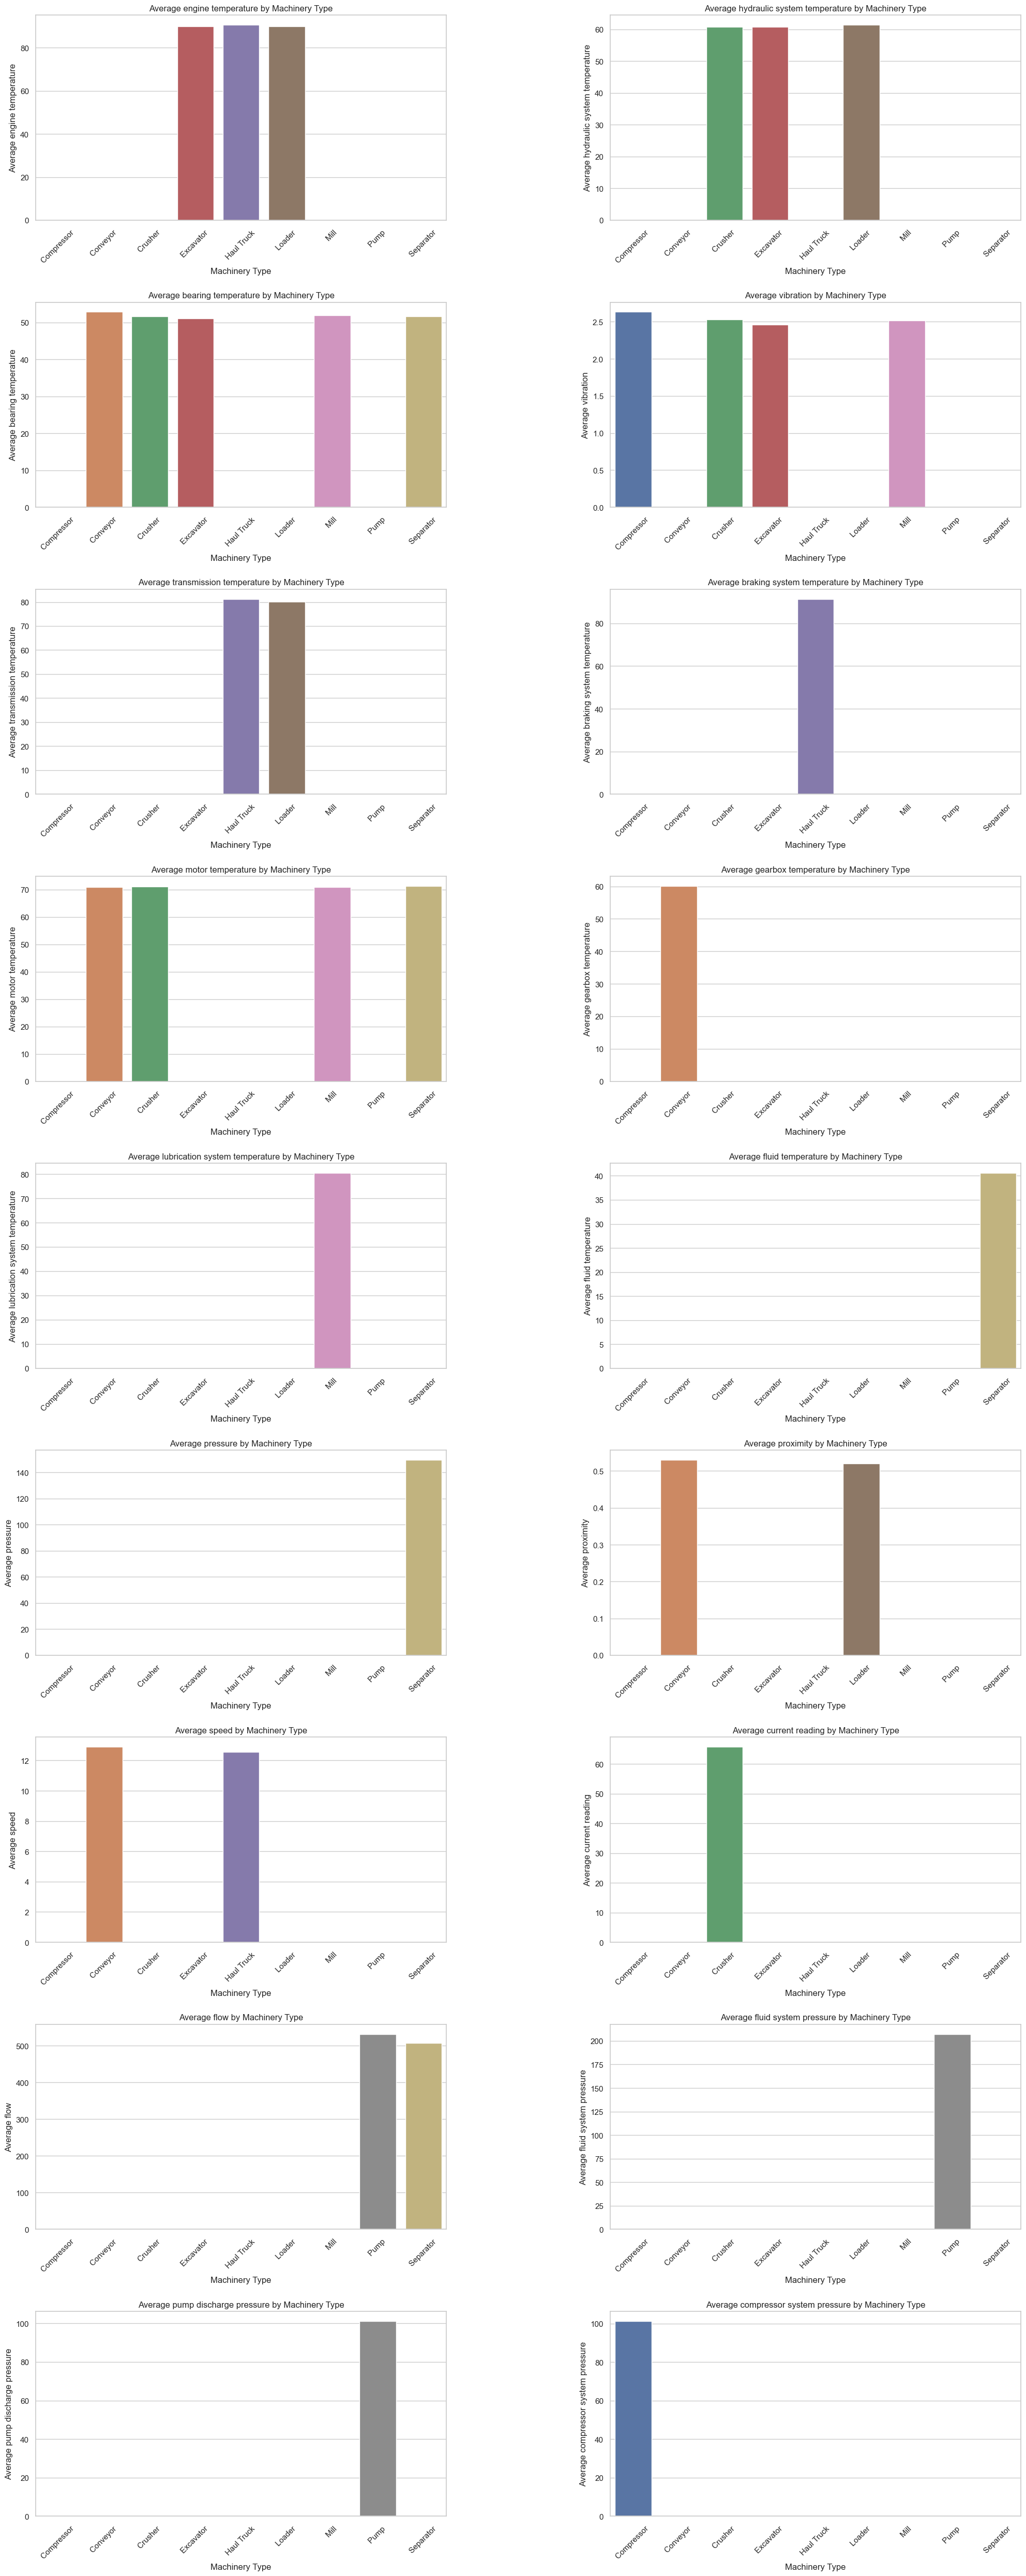

In [31]:
# Average readings for different sensor attributes by machinery type

# Remove numeric part from machineryequipment column
sensor_data_df['machineryequipment'] = sensor_data_df['machineryequipment'].apply(lambda x: re.sub(r'\d+', '', x))

# Calculate average readings for different sensor attributes by machinery type
avg_sensor_data_df = sensor_data_df.groupby('machineryequipment')[sensor_columns].mean()

# Define the number of columns and rows for subplots
num_columns = 2
num_rows = (len(sensor_columns) + num_columns - 1) // num_columns

# Create subplots with increased figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 50))

# Flatten the axes array to access each subplot
axes = axes.flatten()

for index, attribute in enumerate(sensor_columns):
    ax = axes[index]
    
    sns.barplot(data=avg_sensor_data_df, x=avg_sensor_data_df.index, y=attribute, ax=ax)
    ax.set_title(f"Average {attribute.replace('_', ' ')} by Machinery Type")
    ax.set_xlabel("Machinery Type")
    ax.set_ylabel(f"Average {attribute.replace('_', ' ')}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
# Adjust layout to prevent overlap and improve spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


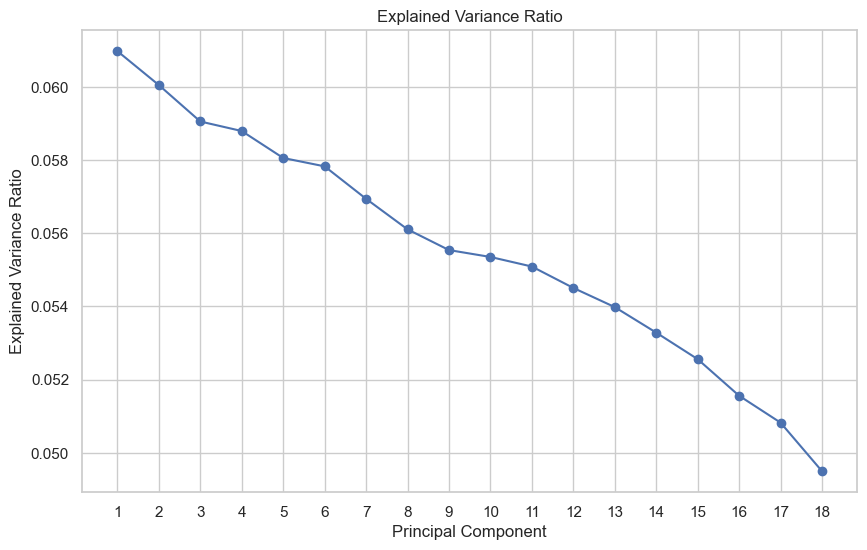

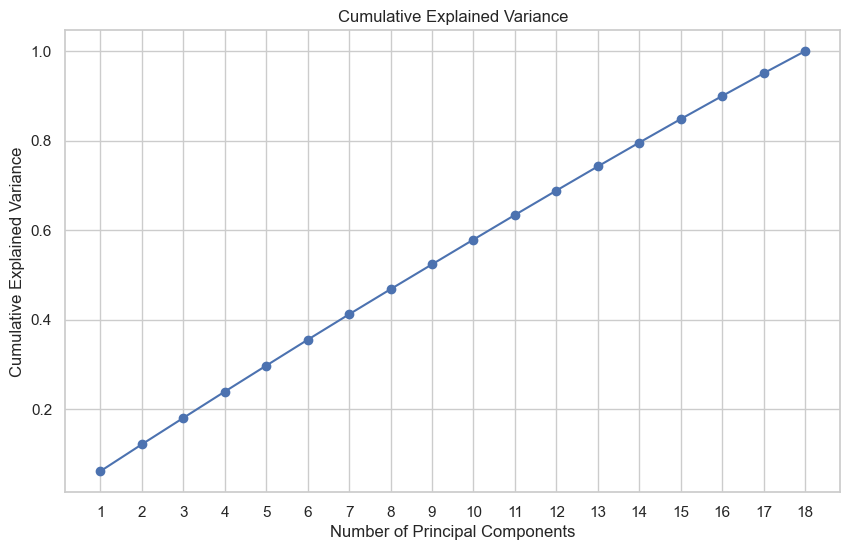

In [32]:
# Drop the non-numeric columns from sensor_data_df
numeric_sensor_data = sensor_data_df.drop(['eventtimestamp', 'machineryequipment'], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or other strategies
imputed_sensor_data = imputer.fit_transform(numeric_sensor_data)

# Standardize the data
scaler = StandardScaler()
scaled_sensor_data = scaler.fit_transform(imputed_sensor_data)

# Apply PCA
pca = PCA()
pca.fit(scaled_sensor_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.show()